In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer

In [4]:
df = pd.read_csv("C:\\Users\\User\\OneDrive\\Documents\\Elysian\\IMDB_Dataset.csv")

In [5]:
pd.set_option("max.colwidth",0)

In [6]:
df.sample()

,review,sentiment
33417,"I see that C. Thomas Howell has appeared in many movies since his heyday in the 80s as an accomplished young actor.<br /><br />I bought this DVD because it was cheap and in part for the internet-related plot and to see how much older C. Thomas Howell is; I do not recall seeing him in any movies since the 1980s.<br /><br />In just a few words: what a very big disappointment. I give some low budget movies a chance, but this one started out lame. Within the first 15 minutes of the movie, this elusive woman is chatting with an Asian guy in a chatroom. They basically stimulate themselves to their own chat, she then insists on meeting the participant in person. She meets him, has sex, ties him up and then murders him in cold blood. The plot then deteriorates further.<br /><br />The plot is thin and flimsy and the acting is very stiff. Do not bother renting it much less purchasing it, even if it is in the $1 DVD bin. I plan to take my copy of the DVD to Goodwill. I am truly amazed that any of the prior reviewers here gave this movie a bad rating.",negative


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df["sentiment"] = label.fit_transform(df["sentiment"])

In [9]:
df

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",1
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",1
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",1
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, f

In [10]:
df.describe()

,sentiment
count,50000.000000
mean,0.500000
std,0.500005
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [11]:
df.head(3)

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",1
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",1
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",1


In [12]:
df["review"] = df["review"].apply(lambda x : x.replace("<br />",""))

In [13]:
df.sample()

,review,sentiment
35684,"i'm not going to ramble on about it but i'm just going to make it brief. basically for those who don't know how prue actually died........... the first time round the demonic assassin comes hit piper and prue with an energy ball they fly through the wall blood everywhere. phoebe the third sister comes down the stairs, says the spell which send him away but not vanquished.(NEEDS THE POWER OF THREE)leo comes heals them both and so on. they get exposed along the line and the only way the can be saved is for a demon named tempus to turn back time. the only way he can do that is is phoebe stays in the underworld. she agrees, tempus turns back time. it now around 7:00 in the morning again. demon comes strucks piper and prue with energy ball. they fly through wall again. but this time phoebe isn't there to say the spell to fend demon off. demon kills doctor. doctor flies through window. he is dead. demon goes in a whirl wing type thing and glass on the doors shatter which is a great effect bye the way and there is and airy sound. thats where it ends. NOW.......... what the whole world doesn't know if they didn't pay attention to the next episode. although what i'm about to say wasn't shown its what happens trust me................ because this time there was no phoebe to call for leo this time he arrives later. piper survives because her injuries wern't as fatal as prue's and leo heals her first before prue so by that time prue is already dead. there mystery solved. ps calling for prue with a spell should have worked!!! and she should have made a surprise appearance in the last ever episode.OK i did ramble on",1


In [14]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [15]:
df.duplicated().sample(2)

8935     False
34984    False
dtype: bool

In [16]:
def remove_punc(test_str):
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
 


    for ele in test_str:
        if ele in punc:
            test_str = test_str.replace(ele, "")
    return test_str
df["review"] = df["review"].apply(remove_punc)

In [17]:
df.sample()

,review,sentiment
38155,This was the first Mickey Mouse cartoon released and the first cartoon with sound It was based on a silent movie called Steamboat Bill Jr starring Buster Keaton Back in this early Mickey short Mickey did not talk nor did he have gloves He could just whistle and play music The song that he played was Turkey in the Straw using several barnyard animals as musical instruments He plays a cows teeth as a xylophone and he plays a nursing sows teats like an accordion keyboard Captain Pete however is very mad and makes Mickey peel potatoes in the galley Petes parrot flies up to the window and orders him to peel the potatoes Mickey throws a halfpeeled potato at the parrot and laughs thus closing the cartoon I was able to get this cartoon on tape and I really like it I think the Disney shorts are much better than the feature length movies,1


In [18]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')
df["review"] = df["review"].apply(lambda x : ' '.join(x.lower() for x in x.split() if x not in stopwords))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
df.sample()

,review,sentiment
27112,can really troma movie some scenes almost a movie look the acting generally competent two leads nursesurrogate especially good i liked confrontations young capulets ques scenes smoothly edited plot coherent its funny it hip original sound trackit usual troma grossouts low humor i dont think shakespeare would minded much in fact i think might gotten good laughs thisits good dvd there alternate sound track informative commentary director several deleted scenes usual collection troma selfdeprecating sillinessim going tell citizen kane pretty inspired lowbudget filmmaking,1


In [22]:
from textblob import Word

nltk.download('wordnet')

def lemmatize_words(text): 
    words = [Word(word).lemmatize() for word in text.split()]
    return " ".join(words)

# apply function to review
df['review'] = df.review.apply(lemmatize_words)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...


In [23]:
df.sample()

,review,sentiment
38978,this film strictly fan debbie reynolds eddie fisheri get angry tcm showing mess frequently bachelor mother delightful original i get angrier still hollywood boob thought would good idea remake bachelor mother filling lame song serve interrupt flow cute comedy instead hollywood could spent time money energy talent wasted horrible remake give u something new original wow conceptbachelor mother original ginger rogers david niven spicy stew simmering sexuality it 1930s wink hay office bundle joy remake debbie reynolds eddie fisher strictly milk cooky it 1950s handshake eisenhowerwhich cast would rather watch debbie reynolds eddie fisher adolphe menjou ginger rogers david niven charles coburn for every member cast original version far better hisher counterpart remakein original beautiful young ginger rogers peak david niven delivers perfectly somewhat spoiled sophisticated yet befuddled scion wealthy department store magnate and i always love see charles coburn movie in bachelor mother priceless desperate grandfather wannabein bundle joy debbie reynolds usual perky self she fine role although performance along fisher completely change tone story a actor eddie fisher hopeless he completely lacking screen presence here way wholesome story his acting completely bland clueless likewise singing bland unremarkable completely forgotten world large the time completely painful butterfield 8 incidentally doesnt sing here fisher lame performance alone enough ruin movie adolphe menjou favorite character actor delivers competent performance one best he blustering commanding he fisher convincing father sondo see musical music story merely incidental or watch musical story hopefullly good music used seasoning if former might like lame remake otherwise much better watching ginger rogers nonmusical original bachelor mother,0


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df["review"], df["sentiment"], random_state=42, test_size=0.2)

In [25]:
X_train.shape

(40000,)

In [26]:
y_train.shape

(40000,)

In [27]:
from sklearn.pipeline import Pipeline
from sklearn import svm

from sklearn.svm import SVC
 
from sklearn.feature_extraction.text import TfidfVectorizer

pipeline = Pipeline([
    ("vec", TfidfVectorizer(min_df= 10, ngram_range=(1,3))),
    ("svc", svm.SVC(kernel='linear'))
])

In [28]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vec', TfidfVectorizer(min_df=10, ngram_range=(1, 3))),
                ('svc', SVC(kernel='linear'))])

In [29]:
y_pred = pipeline.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [31]:
accuracy_score(y_test, y_pred)

0.9043

<Axes: >

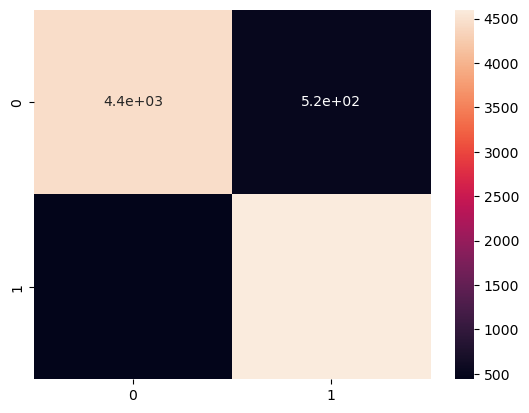

In [32]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)

In [33]:
print(confusion_matrix(y_test,y_pred))

[[4442  519]
 [ 438 4601]]


In [34]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      4880
           1       0.91      0.90      0.91      5120

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [37]:
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
model = Pipeline([
    ("vec", TfidfVectorizer(min_df= 10, ngram_range=(1,3))),
    ("xgb", XGBClassifier())
])

In [38]:
model.fit(X_train,y_train)

Pipeline(steps=[('vec', TfidfVectorizer(min_df=10, ngram_range=(1, 3))),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [39]:
y_pred_xg = model.predict(X_test)

In [40]:
accuracy_score(y_test, y_pred_xg)

0.8587

<Axes: >

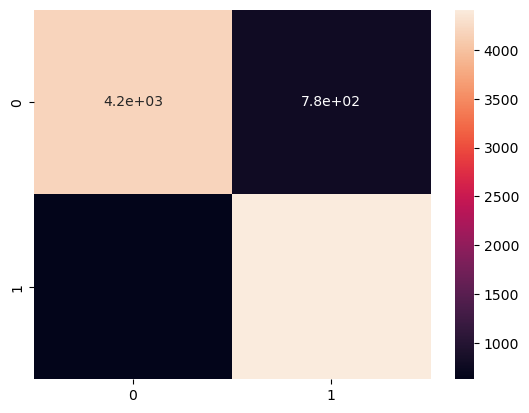

In [41]:
sns.heatmap(confusion_matrix(y_test,y_pred_xg),annot=True)

In [42]:
print(confusion_matrix(y_test,y_pred_xg))

[[4176  785]
 [ 628 4411]]
